In [24]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Genaro\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
#This program uses RNN called LSTM to predict stock price of a corporation (Apple Inc.) Using the past 60 day stock price.

In [26]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
#Get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = '1980-12-12', end='now')
df

C:\Users\Genaro\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.100178
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.094952
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.087983
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090160
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.092774
...,...,...,...,...,...,...
2022-06-15,137.339996,132.160004,134.289993,135.429993,91533000.0,135.429993
2022-06-16,132.389999,129.039993,132.080002,130.059998,108123900.0,130.059998
2022-06-17,133.080002,129.809998,130.070007,131.559998,134118500.0,131.559998


In [28]:
#Get the number of rows and columns in the dataset
df.shape

(10470, 6)

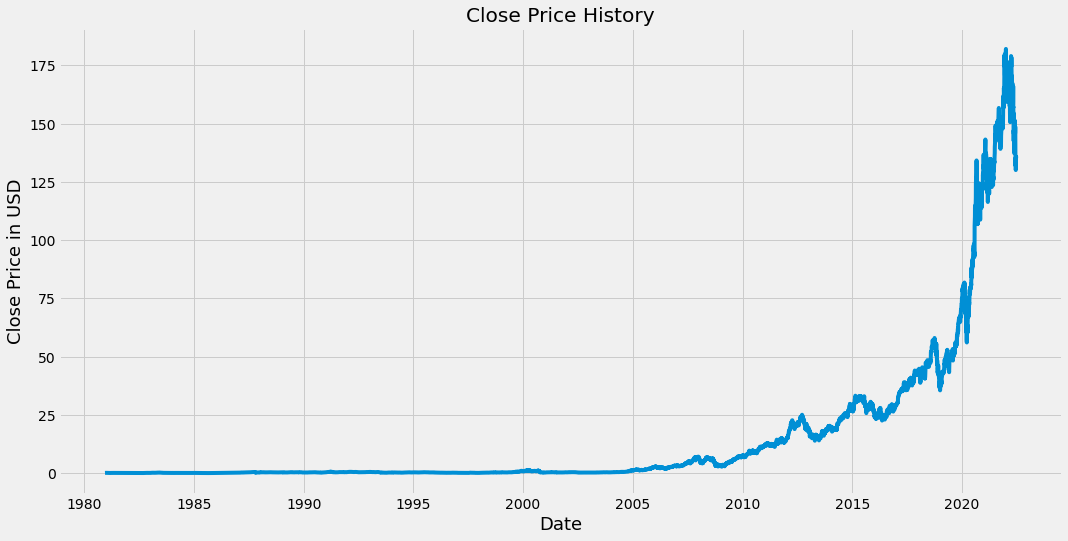

In [29]:
#Visualize the close price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize = 18)
plt.show()

In [30]:
#Create a new dataframe with only close column
data = df.filter(['Close'])

#convert dataframe to a numpy array
dataset = data.values

#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

8376

In [31]:
#Scale the data (normalize)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.35483657e-04],
       [3.98684577e-04],
       [3.49613595e-04],
       ...,
       [7.22742631e-01],
       [7.46429026e-01],
       [7.43571330e-01]])

In [32]:
#Create the training dataset
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
x_train = [] #independent training variables
y_train = [] #dependent training variables

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i <= 60:
     print(x_train)
     print(y_train)
     print()

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214])]
[0.00026067687942511194]



In [33]:
x_train

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
        0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
        0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
        0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
        0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
        0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
        0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
        0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
        0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
        0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
        0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
        0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214]),
 array([0.00039868, 0.00034961, 0.00036495, 0.00038335, 0.00042322,
        0.00045695, 0.00048762, 0.00052749, 0.00060109, 0.00061336,
        0.00059189, 0.00056736, 0.00057656, 0.

In [34]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(8316, 60, 1)

In [35]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

8316/8316 [==============================] - 101s 12ms/step - loss: 2.0599e-05


In [38]:
#Create the test dataset
#Create new array containing scaled values from 20% of the data that not include in training data
test_data = scaled_data[training_data_len - 60:, :]

#create the data sets x_sets and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [39]:
#Convert the data a numpy array
x_test = np.array(x_test)
x_test.shape

(2094, 60)

In [40]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [41]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

66/66 [==============================] - 1s 8ms/step


In [42]:
#get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10.78423797640213

In [43]:
mse = np.mean(predictions - y_test)**2
mse

116.2997887316739

In [44]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Genaro\AppData\Local\Temp\ipykernel_25136\1848240397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


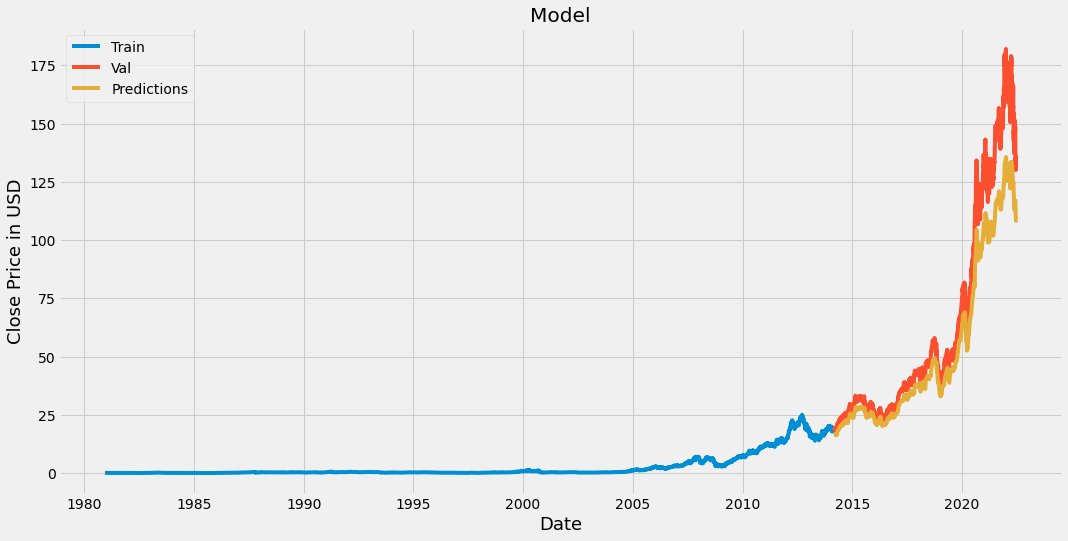

In [45]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [46]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2014-02-28,18.794287,16.443638
2014-03-03,18.848572,16.441319
2014-03-04,18.972857,16.451822
2014-03-05,19.012857,16.483849
2014-03-06,18.955357,16.521360
...,...,...
2022-06-15,135.429993,110.976250
2022-06-16,130.059998,110.213898
2022-06-17,131.559998,108.998817


In [47]:
#Predict future prices

#get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end='now')

#Create new dataframe
new_df = apple_quote.filter(['Close'])

#get the last 60 days closing values and convert the df to an array
last_60_days = new_df[-60:].values

#scale the data to values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create empty list
x_test = []

#append the past 60 days
x_test.append(last_60_days_scaled)

#convert the x_test to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get predicted scale price
pred_price = model.predict(x_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

C:\Users\Genaro\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


1/1 [==============================] - 0s 14ms/step
[[108.47702]]
